# Projectile Trajectories: Angle Optimization

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lookbusy1344/Relativity/blob/main/Python/Projectile%20Trajectories%20-%20Angle%20Optimization.ipynb)

This notebook explores how launch angle affects projectile range with realistic air resistance. We'll find optimal launch angles for different projectiles and compare them to the theoretical 45° optimal angle in vacuum.

## Key Questions
- How does air resistance shift the optimal launch angle from 45°?
- Do different shapes have different optimal angles?
- What physical factors determine the optimal angle?

## Advanced Physics
- Reynolds number-dependent drag coefficients
- ISA atmospheric model with altitude-varying density
- Variable gravity with altitude
- Temperature-dependent air viscosity

In [1]:
import os

# Download the ballistics library if running on Google Colab
if not os.path.exists("ballistics_lib.py"):
    !wget -q https://raw.githubusercontent.com/lookbusy1344/Relativity/main/Python/ballistics_lib.py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
from ballistics_lib import (
    projectile_distance3,
    calculate_reynolds_number,
    drag_coefficient_shape,
    get_air_density_isa,
    get_dynamic_viscosity,
    get_temperature_at_altitude,
)

# Configure matplotlib for better plots
plt.rcParams["figure.figsize"] = (14, 10)
plt.rcParams["font.size"] = 12

## Setup: Define Test Projectiles

We'll test two representative projectiles:
1. A sports ball (sphere)
2. A human traveling head-first

In [2]:
# Launch parameters
LAUNCH_SPEED = 100.0  # m/s

# Test projectiles
test_projectiles = {
    "sphere": {
        "shape": "sphere",
        "mass": 5.0,
        "area": 0.05,
        "description": "Sports ball",
    },
    "human_head_first": {
        "shape": "human_prone",
        "mass": 70.0,
        "area": 0.18,
        "description": "Human head-first",
    },
}

# Calculate vacuum optimal for comparison
vacuum_optimal_angle = 45.0
vacuum_optimal_range = (
    LAUNCH_SPEED**2 * math.sin(2 * math.radians(vacuum_optimal_angle)) / 9.81
)

print("LAUNCH PARAMETERS")
print("=" * 50)
print(f"Launch Speed: {LAUNCH_SPEED:.1f} m/s")
print(f"Vacuum optimal: {vacuum_optimal_angle}° → {vacuum_optimal_range:.1f} m")
print("=" * 50)

LAUNCH PARAMETERS
Launch Speed: 100.0 m/s
Vacuum optimal: 45.0° → 1019.4 m


## Angle Study: Sports Ball

Let's examine how launch angle affects range by firing a ball at angles from 25° to 50°.

In [3]:
# Choose sphere for first study
test_projectile = test_projectiles["sphere"]
angle_range = np.arange(25, 51, 1)

print("ANGLE OPTIMIZATION STUDY - SPORTS BALL")
print("=" * 50)
print(f"Test Object: {test_projectile['description']}")
print(f"Mass: {test_projectile['mass']:.1f} kg")
print(f"Surface Area: {test_projectile['area']:.3f} m²")
print(f"Launch Speed: {LAUNCH_SPEED:.1f} m/s")
print("=" * 50)

# Calculate range for each angle
angle_data = {}
max_range = 0
optimal_angle = 0

print("\nAngle  | Range (m) | Flight Time (s) | Max Height (m)")
print("-" * 50)

for angle in angle_range:
    trajectory = projectile_distance3(
        speed=LAUNCH_SPEED,
        angle_deg=angle,
        mass=test_projectile["mass"],
        surface_area=test_projectile["area"],
        shape=test_projectile["shape"],
        altitude_model=True,
        return_trajectory=True,
        n_points=150,
    )

    angle_data[angle] = trajectory

    if trajectory["distance"] > max_range:
        max_range = trajectory["distance"]
        optimal_angle = angle

    print(
        f"{angle:5.0f}° | {trajectory['distance']:8.1f} | {trajectory['t'][-1]:11.2f} | {max(trajectory['y']):10.1f}"
    )

print("-" * 50)
print(f"OPTIMAL ANGLE: {optimal_angle}° with range {max_range:.1f} m")
print(
    f"Air resistance shifts optimal angle by {optimal_angle - vacuum_optimal_angle:.0f}°"
)

ANGLE OPTIMIZATION STUDY - SPORTS BALL
Test Object: Sports ball
Mass: 5.0 kg
Surface Area: 0.050 m²
Launch Speed: 100.0 m/s

Angle  | Range (m) | Flight Time (s) | Max Height (m)
--------------------------------------------------
   25° |    595.7 |        7.99 |       78.6
   26° |    608.4 |        8.27 |       84.2
   27° |    620.3 |        8.54 |       89.9
   28° |    631.4 |        8.81 |       95.7
   29° |    641.8 |        9.08 |      101.7
   30° |    651.3 |        9.35 |      107.7
   31° |    660.1 |        9.61 |      113.9
   32° |    668.1 |        9.87 |      120.1
   33° |    675.4 |       10.13 |      126.4
   34° |    681.9 |       10.38 |      132.8
   35° |    687.6 |       10.63 |      139.2
   36° |    692.6 |       10.87 |      145.7
   37° |    696.8 |       11.12 |      152.3
   38° |    700.3 |       11.35 |      158.9
   39° |    703.1 |       11.59 |      165.5
   40° |    705.1 |       11.82 |      172.2
   41° |    706.4 |       12.05 |      178.9
   42

## Visualization: Ball Trajectory Analysis

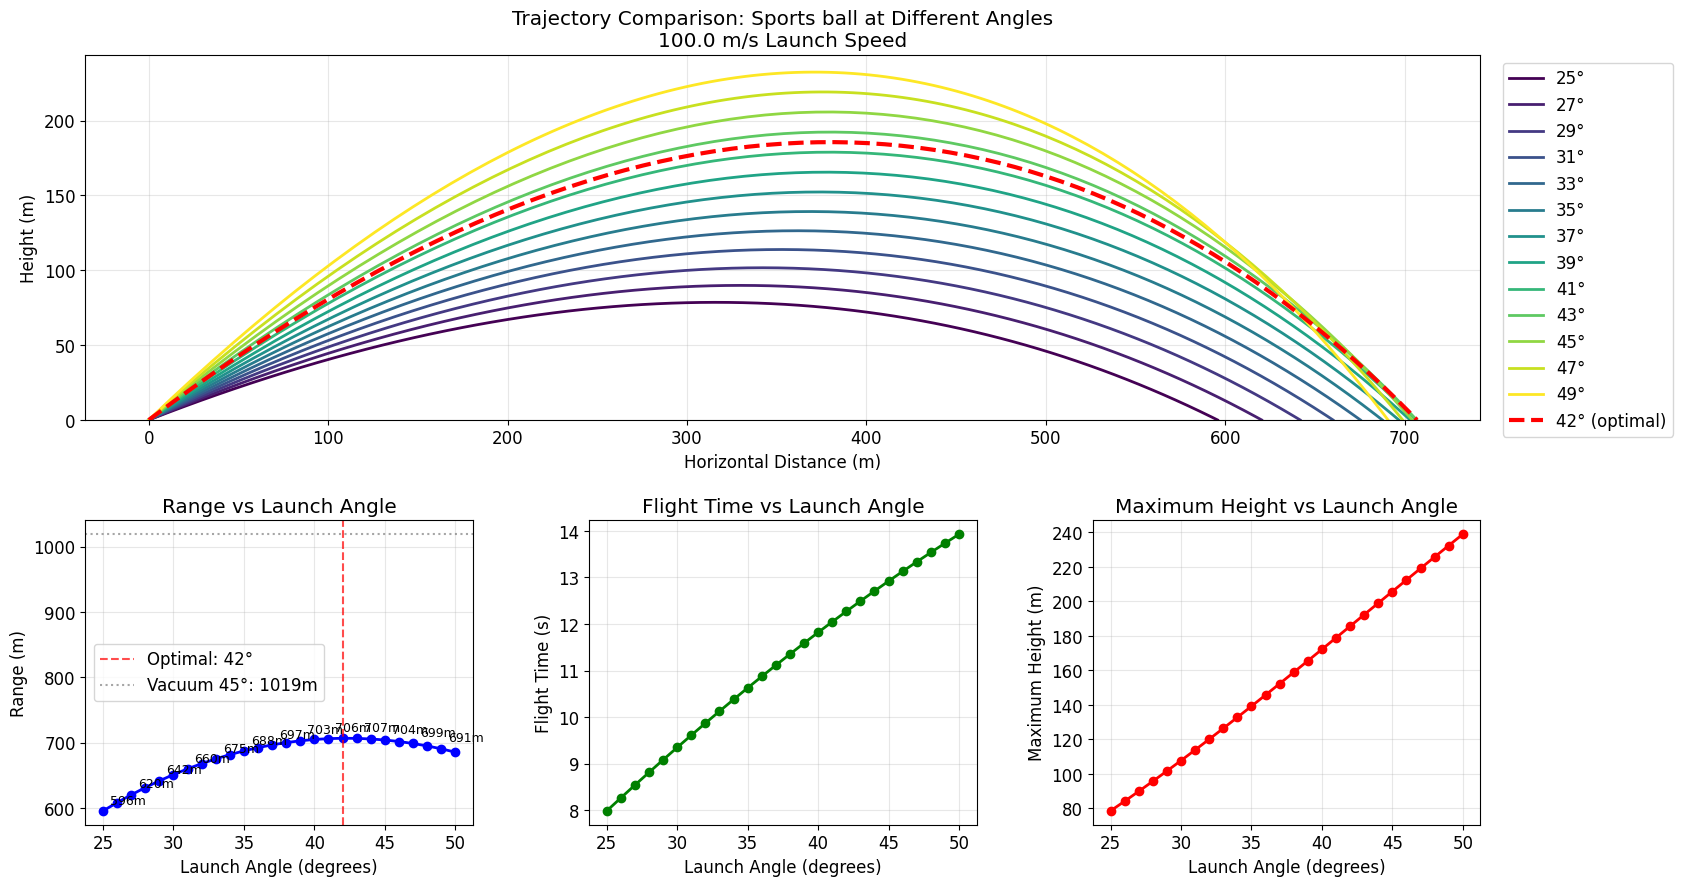

In [4]:
# Create comprehensive angle comparison plots
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, height_ratios=[1.2, 1], hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])

# Plot 1: All trajectories - show every 2 degrees
plot_angles = angle_range[::2]
colors_angles = plt.colormaps["viridis"](np.linspace(0, 1, len(plot_angles)))

for i, angle in enumerate(plot_angles):
    traj = angle_data[angle]
    line_style = "--" if angle == optimal_angle else "-"
    line_width = 3 if angle == optimal_angle else 2

    ax1.plot(
        traj["x"],
        traj["y"],
        color=colors_angles[i],
        linestyle=line_style,
        linewidth=line_width,
        label=f"{angle}°" + (" (optimal)" if angle == optimal_angle else ""),
    )

if optimal_angle not in plot_angles:
    traj = angle_data[optimal_angle]
    ax1.plot(
        traj["x"],
        traj["y"],
        color="red",
        linestyle="--",
        linewidth=3,
        label=f"{optimal_angle}° (optimal)",
    )

ax1.set_xlabel("Horizontal Distance (m)")
ax1.set_ylabel("Height (m)")
ax1.set_title(
    f"Trajectory Comparison: {test_projectile['description']} at Different Angles\n{LAUNCH_SPEED} m/s Launch Speed"
)
ax1.grid(True, alpha=0.3)
ax1.legend(bbox_to_anchor=(1.01, 1), loc="upper left")
ax1.set_ylim(bottom=0)

# Plot 2: Range vs Angle
angles_list = list(angle_data.keys())
ranges_list = [angle_data[angle]["distance"] for angle in angles_list]

ax2.plot(angles_list, ranges_list, "bo-", linewidth=2, markersize=6)
ax2.axvline(
    x=float(optimal_angle),
    color="red",
    linestyle="--",
    alpha=0.7,
    label=f"Optimal: {optimal_angle}°",
)
ax2.axhline(
    y=vacuum_optimal_range,
    color="gray",
    linestyle=":",
    alpha=0.7,
    label=f"Vacuum 45°: {vacuum_optimal_range:.0f}m",
)

ax2.set_xlabel("Launch Angle (degrees)")
ax2.set_ylabel("Range (m)")
ax2.set_title("Range vs Launch Angle")
ax2.grid(True, alpha=0.3)
ax2.legend()

# Add range values every 2 degrees
for angle, range_val in zip(angles_list[::2], ranges_list[::2]):
    ax2.annotate(
        f"{range_val:.0f}m",
        xy=(angle, range_val),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=9,
    )

# Plot 3: Flight time vs Angle
flight_times = [angle_data[angle]["t"][-1] for angle in angles_list]
ax3.plot(angles_list, flight_times, "go-", linewidth=2, markersize=6)
ax3.set_xlabel("Launch Angle (degrees)")
ax3.set_ylabel("Flight Time (s)")
ax3.set_title("Flight Time vs Launch Angle")
ax3.grid(True, alpha=0.3)

# Plot 4: Maximum height vs Angle
max_heights = [max(angle_data[angle]["y"]) for angle in angles_list]
ax4.plot(angles_list, max_heights, "ro-", linewidth=2, markersize=6)
ax4.set_xlabel("Launch Angle (degrees)")
ax4.set_ylabel("Maximum Height (m)")
ax4.set_title("Maximum Height vs Launch Angle")
ax4.grid(True, alpha=0.3)

plt.show()

## Key Findings: Why Lower Angles Perform Better

Unlike the theoretical 45° optimal in vacuum, air resistance shifts the optimal launch angle lower (typically 35-42°):

1. **Reduced flight time**: Lower angles mean less time exposed to drag forces
2. **Velocity maintenance**: Projectiles retain more horizontal velocity with less time fighting gravity
3. **Density advantage**: Flatter trajectories stay in denser air where Reynolds effects are more favorable
4. **Reynolds number effects**: As velocity changes throughout flight, drag coefficients vary dynamically

## Angle Study: Human Head-First

Now let's perform the same analysis for a human traveling head-first with different mass and drag characteristics.

In [5]:
# Choose human head-first
test_human = test_projectiles["human_head_first"]
angle_range_human = np.arange(25, 51, 1)

print("ANGLE OPTIMIZATION STUDY - HUMAN HEAD-FIRST")
print("=" * 50)
print(f"Test Object: {test_human['description']}")
print(f"Mass: {test_human['mass']:.1f} kg")
print(f"Surface Area: {test_human['area']:.3f} m²")
print(f"Launch Speed: {LAUNCH_SPEED:.1f} m/s")
print("=" * 50)

angle_data_human = {}
max_range_human = 0
optimal_angle_human = 0

print("\nAngle  | Range (m) | Flight Time (s) | Max Height (m)")
print("-" * 50)

for angle in angle_range_human:
    trajectory = projectile_distance3(
        speed=LAUNCH_SPEED,
        angle_deg=angle,
        mass=test_human["mass"],
        surface_area=test_human["area"],
        shape=test_human["shape"],
        altitude_model=True,
        return_trajectory=True,
        n_points=150,
    )

    angle_data_human[angle] = trajectory

    if trajectory["distance"] > max_range_human:
        max_range_human = trajectory["distance"]
        optimal_angle_human = angle

    print(
        f"{angle:5.0f}° | {trajectory['distance']:8.1f} | {trajectory['t'][-1]:11.2f} | {max(trajectory['y']):10.1f}"
    )

print("-" * 50)
print(f"OPTIMAL ANGLE: {optimal_angle_human}° with range {max_range_human:.1f} m")
print(
    f"Air resistance shifts optimal angle by {optimal_angle_human - vacuum_optimal_angle:.0f}°"
)

ANGLE OPTIMIZATION STUDY - HUMAN HEAD-FIRST
Test Object: Human head-first
Mass: 70.0 kg
Surface Area: 0.180 m²
Launch Speed: 100.0 m/s

Angle  | Range (m) | Flight Time (s) | Max Height (m)
--------------------------------------------------
   25° |    508.0 |        7.60 |       71.5
   26° |    517.2 |        7.86 |       76.4
   27° |    525.7 |        8.11 |       81.4
   28° |    533.5 |        8.36 |       86.5
   29° |    540.8 |        8.61 |       91.7
   30° |    547.3 |        8.85 |       97.0
   31° |    553.3 |        9.09 |      102.3
   32° |    558.7 |        9.33 |      107.7
   33° |    563.5 |        9.56 |      113.2
   34° |    567.6 |        9.79 |      118.7
   35° |    571.2 |       10.02 |      124.3
   36° |    574.2 |       10.24 |      129.9
   37° |    576.6 |       10.46 |      135.5
   38° |    578.5 |       10.67 |      141.1
   39° |    579.7 |       10.89 |      146.8
   40° |    580.5 |       11.10 |      152.5
   41° |    580.6 |       11.30 |      

## Visualization: Human Trajectory Analysis

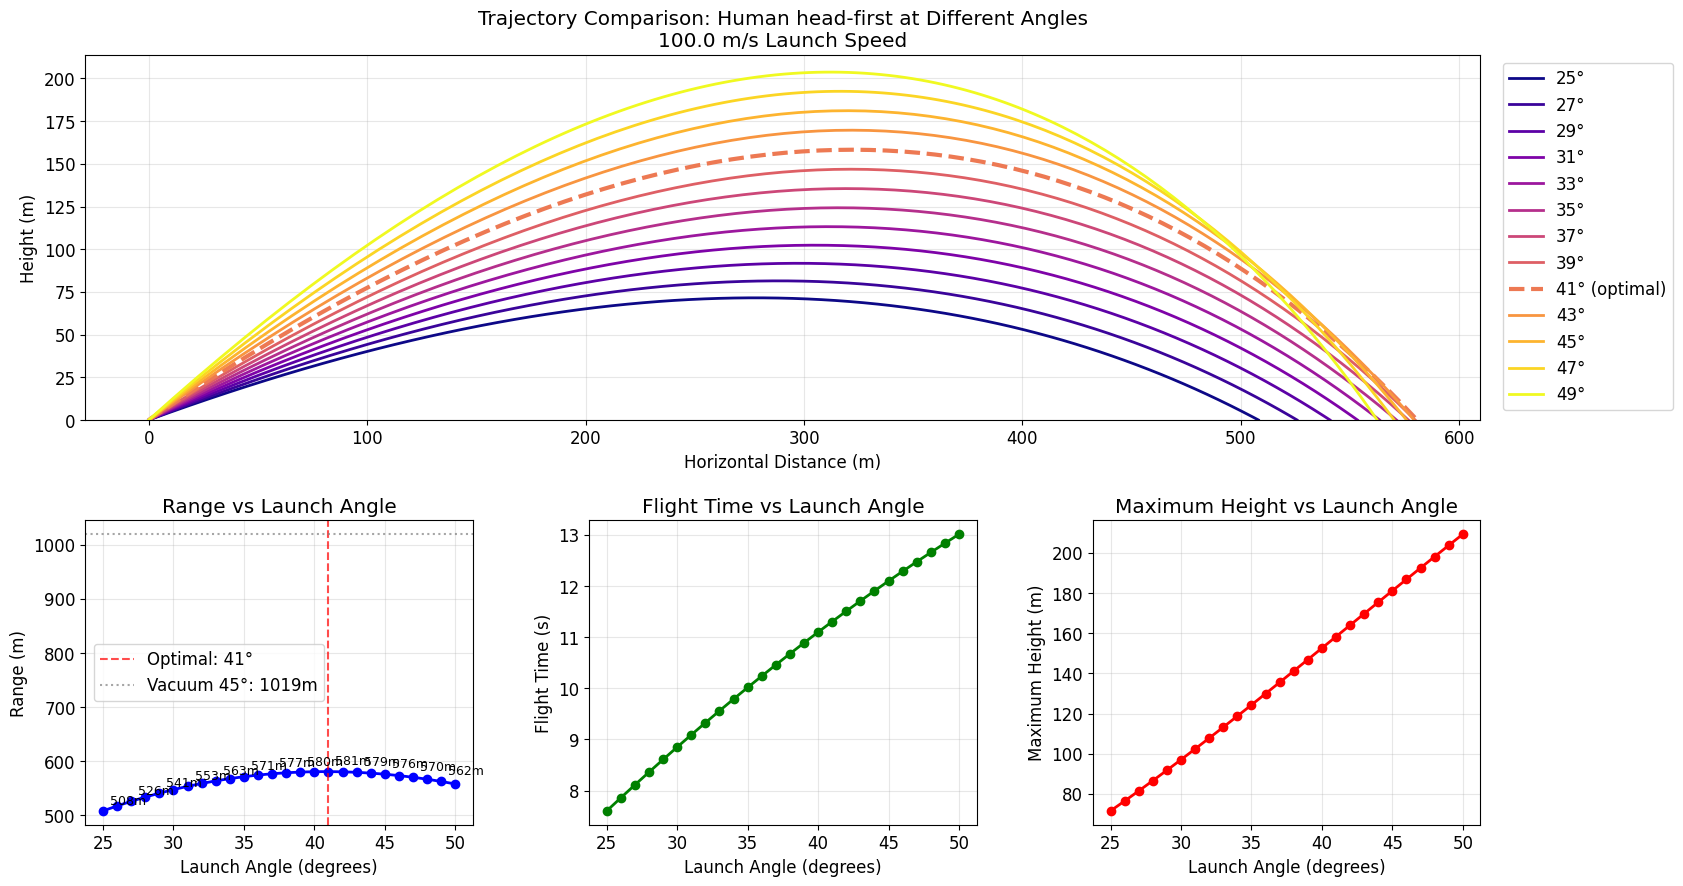

In [6]:
# Create comprehensive plots for human
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, height_ratios=[1.2, 1], hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])

# Plot 1: All trajectories
plot_angles_human = angle_range_human[::2]
colors_angles_human = plt.colormaps["plasma"](np.linspace(0, 1, len(plot_angles_human)))

for i, angle in enumerate(plot_angles_human):
    traj = angle_data_human[angle]
    line_style = "--" if angle == optimal_angle_human else "-"
    line_width = 3 if angle == optimal_angle_human else 2

    ax1.plot(
        traj["x"],
        traj["y"],
        color=colors_angles_human[i],
        linestyle=line_style,
        linewidth=line_width,
        label=f"{angle}°" + (" (optimal)" if angle == optimal_angle_human else ""),
    )

if optimal_angle_human not in plot_angles_human:
    traj = angle_data_human[optimal_angle_human]
    ax1.plot(
        traj["x"],
        traj["y"],
        color="red",
        linestyle="--",
        linewidth=3,
        label=f"{optimal_angle_human}° (optimal)",
    )

ax1.set_xlabel("Horizontal Distance (m)")
ax1.set_ylabel("Height (m)")
ax1.set_title(
    f"Trajectory Comparison: {test_human['description']} at Different Angles\n{LAUNCH_SPEED} m/s Launch Speed"
)
ax1.grid(True, alpha=0.3)
ax1.legend(bbox_to_anchor=(1.01, 1), loc="upper left")
ax1.set_ylim(bottom=0)

# Plot 2: Range vs Angle
angles_list_human = list(angle_data_human.keys())
ranges_list_human = [angle_data_human[angle]["distance"] for angle in angles_list_human]

ax2.plot(angles_list_human, ranges_list_human, "bo-", linewidth=2, markersize=6)
ax2.axvline(
    x=float(optimal_angle_human),
    color="red",
    linestyle="--",
    alpha=0.7,
    label=f"Optimal: {optimal_angle_human}°",
)
ax2.axhline(
    y=vacuum_optimal_range,
    color="gray",
    linestyle=":",
    alpha=0.7,
    label=f"Vacuum 45°: {vacuum_optimal_range:.0f}m",
)

ax2.set_xlabel("Launch Angle (degrees)")
ax2.set_ylabel("Range (m)")
ax2.set_title("Range vs Launch Angle")
ax2.grid(True, alpha=0.3)
ax2.legend()

for angle, range_val in zip(angles_list_human[::2], ranges_list_human[::2]):
    ax2.annotate(
        f"{range_val:.0f}m",
        xy=(angle, range_val),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=9,
    )

# Plot 3: Flight time
flight_times_human = [angle_data_human[angle]["t"][-1] for angle in angles_list_human]
ax3.plot(angles_list_human, flight_times_human, "go-", linewidth=2, markersize=6)
ax3.set_xlabel("Launch Angle (degrees)")
ax3.set_ylabel("Flight Time (s)")
ax3.set_title("Flight Time vs Launch Angle")
ax3.grid(True, alpha=0.3)

# Plot 4: Maximum height
max_heights_human = [max(angle_data_human[angle]["y"]) for angle in angles_list_human]
ax4.plot(angles_list_human, max_heights_human, "ro-", linewidth=2, markersize=6)
ax4.set_xlabel("Launch Angle (degrees)")
ax4.set_ylabel("Maximum Height (m)")
ax4.set_title("Maximum Height vs Launch Angle")
ax4.grid(True, alpha=0.3)

plt.show()

## Comparison: Ball vs Human

Let's compare the two projectiles side-by-side.

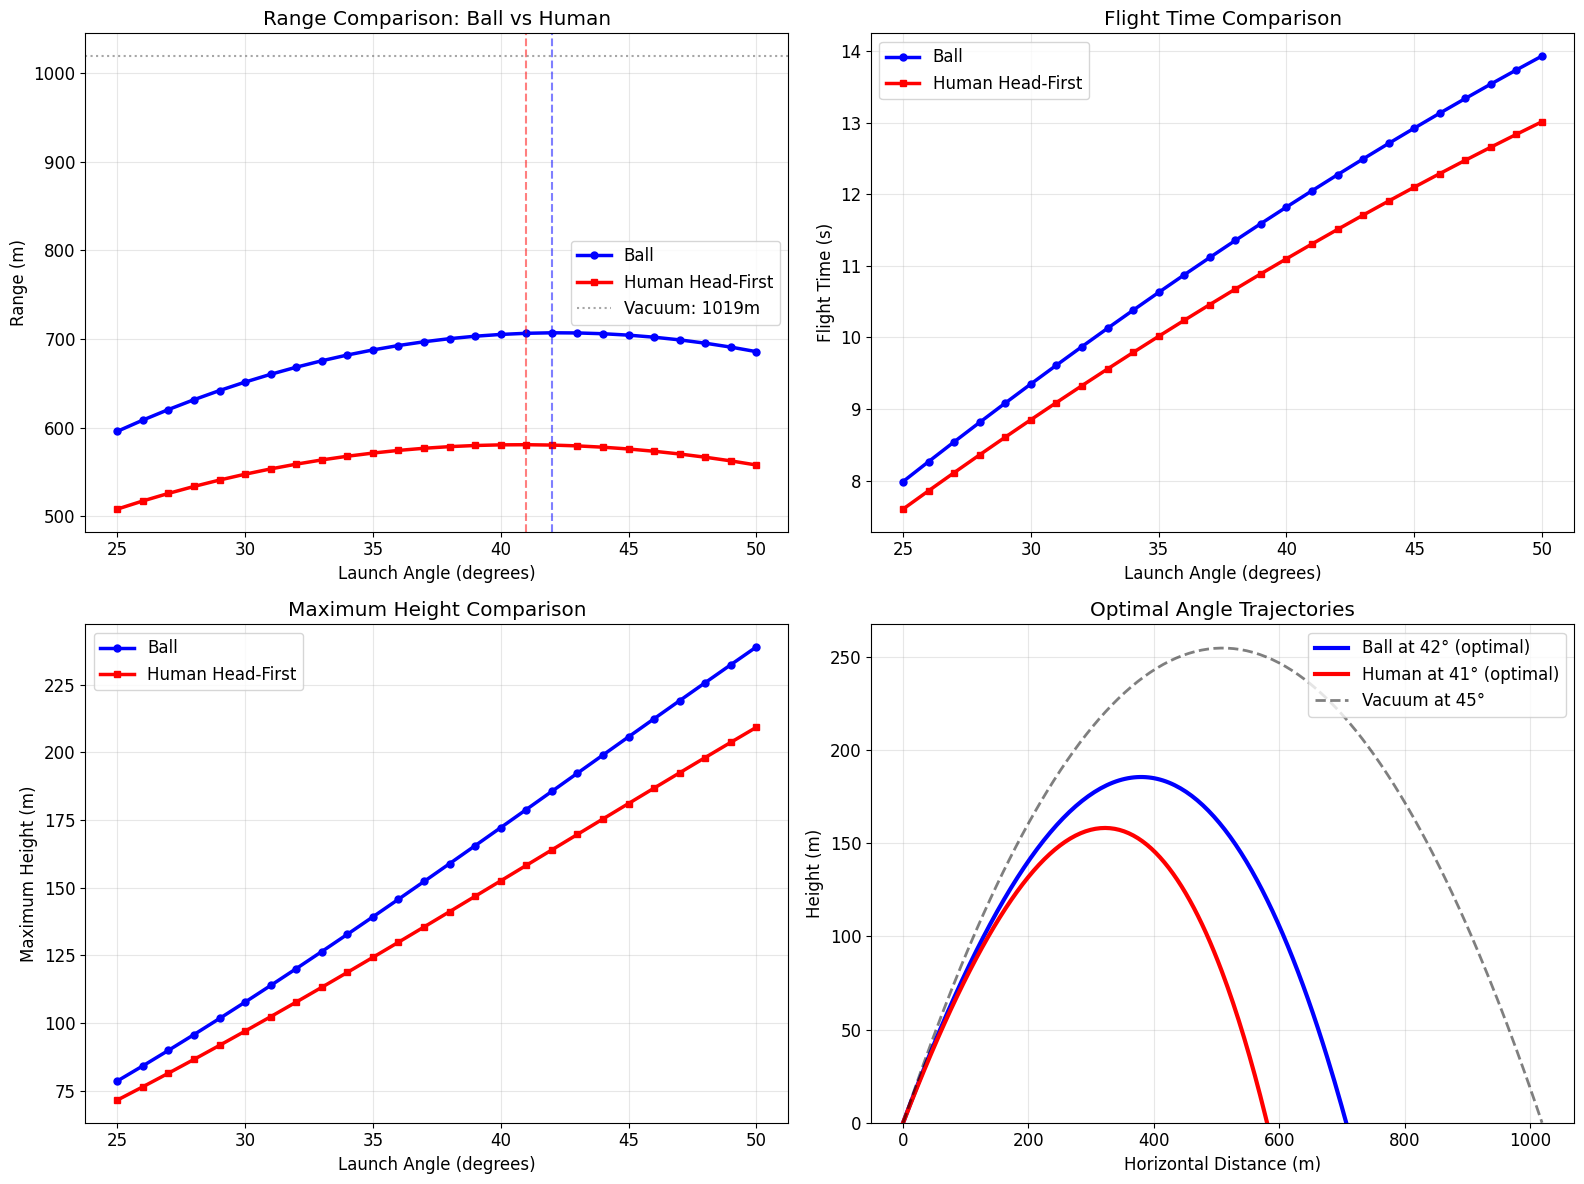


COMPARISON SUMMARY
Metric                         | Ball         | Human Head-First
------------------------------------------------------------
Optimal Angle                  |         42° |            41°
Maximum Range                  |     706.9m |        580.6m
Range Reduction vs Vacuum      |      30.6% |         43.0%


In [7]:
# Create comparison plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Range comparison
ax1.plot(
    angles_list,
    ranges_list,
    "b-",
    linewidth=2.5,
    marker="o",
    markersize=5,
    label="Ball",
)
ax1.plot(
    angles_list_human,
    ranges_list_human,
    "r-",
    linewidth=2.5,
    marker="s",
    markersize=5,
    label="Human Head-First",
)
ax1.axvline(x=float(optimal_angle), color="blue", linestyle="--", alpha=0.5)
ax1.axvline(x=float(optimal_angle_human), color="red", linestyle="--", alpha=0.5)
ax1.axhline(
    y=vacuum_optimal_range,
    color="gray",
    linestyle=":",
    alpha=0.7,
    label=f"Vacuum: {vacuum_optimal_range:.0f}m",
)
ax1.set_xlabel("Launch Angle (degrees)")
ax1.set_ylabel("Range (m)")
ax1.set_title("Range Comparison: Ball vs Human")
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Flight time comparison
ax2.plot(
    angles_list,
    flight_times,
    "b-",
    linewidth=2.5,
    marker="o",
    markersize=5,
    label="Ball",
)
ax2.plot(
    angles_list_human,
    flight_times_human,
    "r-",
    linewidth=2.5,
    marker="s",
    markersize=5,
    label="Human Head-First",
)
ax2.set_xlabel("Launch Angle (degrees)")
ax2.set_ylabel("Flight Time (s)")
ax2.set_title("Flight Time Comparison")
ax2.grid(True, alpha=0.3)
ax2.legend()

# Plot 3: Maximum height comparison
ax3.plot(
    angles_list,
    max_heights,
    "b-",
    linewidth=2.5,
    marker="o",
    markersize=5,
    label="Ball",
)
ax3.plot(
    angles_list_human,
    max_heights_human,
    "r-",
    linewidth=2.5,
    marker="s",
    markersize=5,
    label="Human Head-First",
)
ax3.set_xlabel("Launch Angle (degrees)")
ax3.set_ylabel("Maximum Height (m)")
ax3.set_title("Maximum Height Comparison")
ax3.grid(True, alpha=0.3)
ax3.legend()

# Plot 4: Optimal trajectories overlay
traj_ball_optimal = angle_data[optimal_angle]
traj_human_optimal = angle_data_human[optimal_angle_human]

# Calculate vacuum trajectory for reference
angle_rad = math.radians(45)
vacuum_time = 2 * LAUNCH_SPEED * math.sin(angle_rad) / 9.81
t_vacuum = np.linspace(0, vacuum_time, 200)
x_vacuum = LAUNCH_SPEED * math.cos(angle_rad) * t_vacuum
y_vacuum = LAUNCH_SPEED * math.sin(angle_rad) * t_vacuum - 0.5 * 9.81 * t_vacuum**2

ax4.plot(
    traj_ball_optimal["x"],
    traj_ball_optimal["y"],
    "b-",
    linewidth=3,
    label=f"Ball at {optimal_angle}° (optimal)",
)
ax4.plot(
    traj_human_optimal["x"],
    traj_human_optimal["y"],
    "r-",
    linewidth=3,
    label=f"Human at {optimal_angle_human}° (optimal)",
)
ax4.plot(
    x_vacuum,
    y_vacuum,
    "k--",
    linewidth=2,
    alpha=0.5,
    label="Vacuum at 45°",
)
ax4.set_xlabel("Horizontal Distance (m)")
ax4.set_ylabel("Height (m)")
ax4.set_title("Optimal Angle Trajectories")
ax4.grid(True, alpha=0.3)
ax4.legend()
ax4.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

# Print summary
print("\nCOMPARISON SUMMARY")
print("=" * 60)
print(f"{'Metric':<30} | {'Ball':<12} | {'Human Head-First':<15}")
print("-" * 60)
print(
    f"{'Optimal Angle':<30} | {optimal_angle:>10.0f}° | {optimal_angle_human:>13.0f}°"
)
print(f"{'Maximum Range':<30} | {max_range:>9.1f}m | {max_range_human:>12.1f}m")
print(
    f"{'Range Reduction vs Vacuum':<30} | {(1 - max_range / vacuum_optimal_range) * 100:>9.1f}% | {(1 - max_range_human / vacuum_optimal_range) * 100:>12.1f}%"
)
print("=" * 60)

## Reynolds Number Analysis

Let's investigate why the optimal angles are so similar by examining Reynolds number effects on drag coefficients.

In [8]:
# Calculate characteristic lengths
char_length_ball = 2.0 * np.sqrt(test_projectile["area"] / np.pi)
char_length_human = 2.0 * np.sqrt(test_human["area"] / np.pi)

# Sea level conditions
rho_sea_level = 1.225  # kg/m³
mu_sea_level = 1.81e-5  # Pa·s

print("REYNOLDS NUMBER ANALYSIS")
print("=" * 70)
print(
    f"{'Velocity (m/s)':<15} | {'Ball Re':<12} | {'Ball Cd':<10} | {'Human Re':<12} | {'Human Cd':<10}"
)
print("-" * 70)

velocities = np.array([25, 50, 75, 100])
for v in velocities:
    re_ball = calculate_reynolds_number(
        v, char_length_ball, rho_sea_level, mu_sea_level
    )
    cd_ball = drag_coefficient_shape(test_projectile["shape"], re_ball)
    re_human = calculate_reynolds_number(
        v, char_length_human, rho_sea_level, mu_sea_level
    )
    cd_human = drag_coefficient_shape(test_human["shape"], re_human)

    print(
        f"{v:<15.0f} | {re_ball:<12.0f} | {cd_ball:<10.3f} | {re_human:<12.0f} | {cd_human:<10.3f}"
    )

print("=" * 70)

REYNOLDS NUMBER ANALYSIS
Velocity (m/s)  | Ball Re      | Ball Cd    | Human Re     | Human Cd  
----------------------------------------------------------------------
25              | 426911       | 0.190      | 810007       | 0.700     
50              | 853822       | 0.100      | 1620014      | 0.700     
75              | 1280734      | 0.100      | 2430021      | 0.700     
100             | 1707645      | 0.100      | 3240028      | 0.700     


## Drag Factor Visualization

The effective drag factor (Cd×A/m) determines how drag affects each projectile.

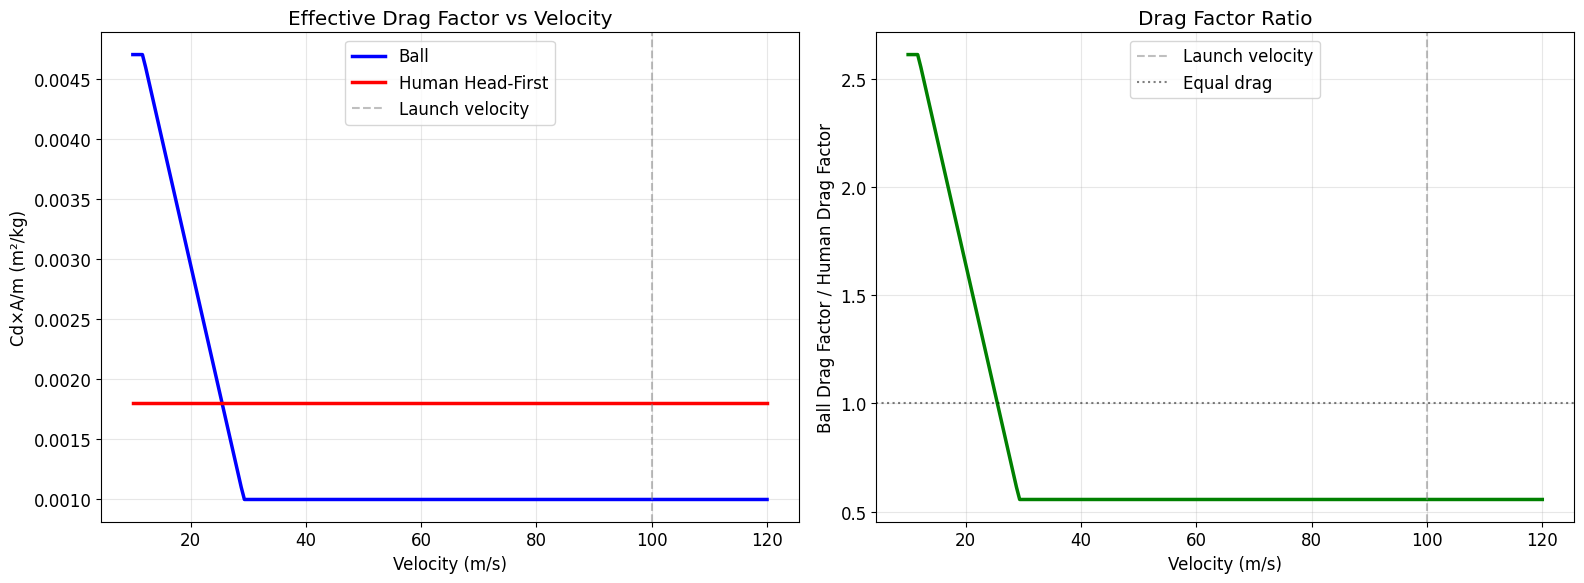

In [9]:
# Calculate drag factors across velocity range
velocities_fine = np.linspace(10, 120, 200)
drag_factor_ball = []
drag_factor_human = []

for v in velocities_fine:
    re_b = calculate_reynolds_number(v, char_length_ball, rho_sea_level, mu_sea_level)
    cd_b = drag_coefficient_shape(test_projectile["shape"], re_b)
    re_h = calculate_reynolds_number(v, char_length_human, rho_sea_level, mu_sea_level)
    cd_h = drag_coefficient_shape(test_human["shape"], re_h)

    drag_factor_ball.append(cd_b * test_projectile["area"] / test_projectile["mass"])
    drag_factor_human.append(cd_h * test_human["area"] / test_human["mass"])

# Plot drag factors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(velocities_fine, drag_factor_ball, "b-", linewidth=2.5, label="Ball")
ax1.plot(
    velocities_fine, drag_factor_human, "r-", linewidth=2.5, label="Human Head-First"
)
ax1.axvline(x=100, color="gray", linestyle="--", alpha=0.5, label="Launch velocity")
ax1.set_xlabel("Velocity (m/s)")
ax1.set_ylabel("Cd×A/m (m²/kg)")
ax1.set_title("Effective Drag Factor vs Velocity")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Ratio of drag factors
ratio = np.array(drag_factor_ball) / np.array(drag_factor_human)
ax2.plot(velocities_fine, ratio, "g-", linewidth=2.5)
ax2.axvline(x=100, color="gray", linestyle="--", alpha=0.5, label="Launch velocity")
ax2.axhline(y=1, color="black", linestyle=":", alpha=0.5, label="Equal drag")
ax2.set_xlabel("Velocity (m/s)")
ax2.set_ylabel("Ball Drag Factor / Human Drag Factor")
ax2.set_title("Drag Factor Ratio")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Sensitivity Test: Effect of Drag Parameters

Let's test how optimal angle changes with different drag scenarios.

In [10]:
# Test different drag scenarios
test_scenarios = {
    "Ball (actual)": {
        "mass": 5.0,
        "area": 0.05,
        "shape": "sphere",
        "description": "5kg ball, 0.05m²",
    },
    "Human (actual)": {
        "mass": 70.0,
        "area": 0.18,
        "shape": "human_prone",
        "description": "70kg human, 0.18m²",
    },
    "Streamlined": {
        "mass": 70.0,
        "area": 0.18,
        "shape": "streamlined",
        "description": "70kg streamlined, 0.18m²",
    },
    "Spread eagle": {
        "mass": 70.0,
        "area": 0.7,
        "shape": "human_standing",
        "description": "70kg spread eagle, 0.7m²",
    },
    "Heavy human": {
        "mass": 120.0,
        "area": 0.18,
        "shape": "human_prone",
        "description": "120kg human, 0.18m²",
    },
    "Light human": {
        "mass": 50.0,
        "area": 0.18,
        "shape": "human_prone",
        "description": "50kg human, 0.18m²",
    },
}

print("SENSITIVITY TEST: OPTIMAL ANGLE vs DRAG PARAMETERS")
print("=" * 80)
print(
    f"{'Scenario':<25} | {'Cd×A/m':<10} | {'Optimal°':<8} | {'Range(m)':<10} | {'Shift':<8}"
)
print("-" * 80)

angle_test_range = np.arange(25, 51, 1)
results = {}

for name, scenario in test_scenarios.items():
    # Calculate drag factor at 100 m/s
    char_len = 2.0 * np.sqrt(scenario["area"] / np.pi)
    re_100 = calculate_reynolds_number(100, char_len, rho_sea_level, mu_sea_level)
    cd_100 = drag_coefficient_shape(scenario["shape"], re_100)
    drag_factor = cd_100 * scenario["area"] / scenario["mass"]

    # Find optimal angle
    max_range_test = 0
    optimal_angle_test = 0

    for angle in angle_test_range:
        dist = projectile_distance3(
            speed=LAUNCH_SPEED,
            angle_deg=angle,
            mass=scenario["mass"],
            surface_area=scenario["area"],
            shape=scenario["shape"],
            altitude_model=True,
            return_trajectory=False,
        )

        if dist > max_range_test:
            max_range_test = dist
            optimal_angle_test = angle

    results[name] = {
        "drag_factor": drag_factor,
        "optimal": optimal_angle_test,
        "range": max_range_test,
    }

    shift = optimal_angle_test - 45
    print(
        f"{name:<25} | {drag_factor:>10.4f} | {optimal_angle_test:>8.0f} | {max_range_test:>10.1f} | {shift:>6.0f}°"
    )

print("=" * 80)

SENSITIVITY TEST: OPTIMAL ANGLE vs DRAG PARAMETERS
Scenario                  | Cd×A/m     | Optimal° | Range(m)   | Shift   
--------------------------------------------------------------------------------
Ball (actual)             |     0.0010 |       42 |      706.9 |     -3°
Human (actual)            |     0.0018 |       41 |      580.6 |     -4°
Streamlined               |     0.0001 |       45 |      970.7 |      0°
Spread eagle              |     0.0120 |       34 |      209.2 |    -11°
Heavy human               |     0.0010 |       42 |      697.1 |     -3°
Light human               |     0.0025 |       40 |      504.6 |     -5°
